In [9]:
#initialisation for easy testing
import Bio
import numpy as np
import sys
import os
import networkx as nx
import random as random
from tqdm import tqdm # loading bar
from utils_copy import linear_C, get_cost_2, get_sequence_string, parse_fasta_multiple, create_score_matrix, write_alignments_to_file, linear_backtrack, extend_alignment, Tree, convert_to_desired_format2,convert_format_mat_to_pseudomat,find_min_span_edges,get_visiting_order,new_sp_approxi_combi
from utils_copy import nothing,convert_to_desired_format_nr_version, compute_cost, my_traversal_simply, extend_alignment_chaos, find_min_span_edges_testing, parse_fasta_multiple_remove_n

score_matrix={'a': {'a': 0, 'c': 5, 'g': 2, 't': 5}, 'c': {'a': 5, 'c': 0, 'g': 5, 't': 2}, 'g': {'a': 2, 'c': 5, 'g': 0, 't': 5}, 't': {'a': 5, 'c': 2, 'g': 5, 't': 0}}
gap_cost=5

filename='brca1-testseqs.fasta'
filename2='brca1-full.fasta'
brca_seqs_work_please,names=parse_fasta_multiple(filename)
brca_seqs_long=parse_fasta_multiple_remove_n(filename2)

#print(brca_seqs_work_please)
print(brca_seqs_long[0][0:7])

#just testing if the removal of n worked!
sequence=brca_seqs_long[0][7]
contains_n = any(letter.lower() == 'n' for letter in sequence)
if contains_n:
    print("The sequence contains at least one 'n' or 'N'.")
else:
    print("The sequence does not contain 'n' or 'N'.")

brca1_bos_taurus
brca1_canis_lupus
brca1_gallus_gallus
brca1_homo_sapiens
brca1_macaca_mulatta
brca1_mus_musculus
brca1_pan_troglodytes
brca1_rattus_norvegicus
[Seq('atggatttatctgcggatcatgttgaagaagtacaaaatgtcctcaatgctatg...tag'), 'atggatttatctgcggatcatgttgaagaagtacaaaatgtcctcaatgctatgcagaaaatcttagagtgtccaatatgtctggagttgatcaaagagcctgtctctacaaagtgtgaccacatattttgcaaattttgtatgctgaaacttctcaaccagaagaaagggccttcacaatgtcctttgtgtaagaatgatataaccaaaagaagcctacaagaaagtacaagatttagtcaacttgttgaagagctgttgaagatcattcatgcttttgagcttgacacaggattgcagtttgcaaacagctataacttttcgagaaaggaagataactctcctgagcatctgaaggaggaagtttctataatccaaagtatgggctaccggaaccgggccaaaagactttggcagagtgaacctgaaaatcctaccttgcaggaaaccagtcttactgtcgaactctctaaccttggaattgtcagatctctgaggacaaagcagcagacacaatctcagaataagtccgtctacattgaattgggatctgattcttctgaagacacagttaataaggccagttatttcagtgtgggagaccatgaattgttagaaatcacccctcaaggagccaaggccaagaccaatttgaatcctgcagaaaaggctgcttgtgagttttctgagaaggacataacaaatactgaacatcatcaactcagtattaaagatctgatcaccacccagaagcatgcaactgagacgc

In [10]:
matrix_for_MST=[]
def new_sp_approxi_combi(seqs: list[str], score_matrix: dict, gap_cost: int, verbose=False, return_center_string=False,layout="spring",traversal_here="df"):
    # STEP 1: Find the center string, s1
    matrix = np.full((len(seqs), len(seqs)), np.nan)
    # loop over all distinct pairs
    for i, seq1 in enumerate(seqs):
        for j, seq2 in enumerate(seqs):
              matrix[i, j] = get_cost_2(linear_C(gap_cost, score_matrix, seq1, seq2))
    print(matrix)
    matrix_for_MST=matrix 
    matrix_for_MST=convert_to_desired_format_nr_version(matrix_for_MST)
    min_span_edges=find_min_span_edges_testing(matrix_for_MST)
    print(matrix_for_MST)
    print(min_span_edges)

    max_indices = np.where(matrix == np.max(matrix))
    max_row_index = max_indices[0][0] #sidste tal 0 eller 1 alt efter hvad man vil ha' lol
    print(max_row_index)

    #need to use the my_transversal_simply but already to put in the graph!
    visiting_order,G=get_visiting_order(min_span_edges,str(int(max_row_index)),traversal_here,layout) #str(int(np.argmin(matrix.sum(axis = 1)))) to get the min arg as the starting point.
    #print(visiting_order) #visiting order is now letters, but we would need that as numbers/idices from the score matrix to keep track. #APPARENTLY NOT ACTUALLY IN USE
    alignment_pairs,index_dict=my_traversal_simply(G,str(int(max_row_index)))
    print("here come the alignment pairs DAMMIT: \n")
    print(alignment_pairs)
    print("here comes the index_dict DAMMIT: \n")
    print(index_dict)
    print("starting point: ")
    print(str(int(max_row_index)))

    # find center string/guide 
    s1_idx = np.argmin(matrix.sum(axis = 1))
    print("nr of seqs:")
    print(len(seqs))
    #seqs_new = [None for _ in range(len(seqs))]
    #s1 = seqs[s1_idx]
    #seqs_new[0]=seqs[s1_idx]
    #for i,element in enumerate(visiting_order,start=1):
     #       seqs_new[i]=seqs[int(element)]
    seqs_new = [None for _ in range(len(seqs))]
    s1 = seqs[s1_idx] #should be "seqs[s1_idx]", but is set to 2 for testing purposes
    seqs_new[0] = seqs[int(max_row_index)] #should be "seqs[s1_idx]", but is set to 2 for testing purposes
    i=1
    print("new seqs before loop")
    print(seqs_new)
    new_s1_index=None
    for i, idx in enumerate(visiting_order):
        seqs_new[int(idx)] = seqs[i]
        if i==s1_idx:
            new_s1_index=idx
        print("idx:"+str(idx)+", i="+str(i))
    print("new s1-index:")
    print(new_s1_index)
    print("seqs new:")
    print(seqs_new)
    print("old seqs:")
    print(seqs)
    print("matrix for source node inspo:")
    print(matrix)
         
         
    #seqs.insert(0, seqs.pop(s1_idx)) # move guide to front of list
    if verbose: print("The center string, s1, is sequence no." + str(s1_idx+1)) # just a print statement to see which string is the center string

    # STEP 2: Construct alignment M
    M: list[list[str]] = [[letter] for letter in [*seqs[int(max_row_index)]]]
    print("M right now:")
    print(M)
    print("s1 right now:")
    print(s1)
    print("seqs right now")
    print(seqs)
    cost_list = []
    # print("first M = \n" + str(M))
    for key,value in alignment_pairs.items(): #was just seqs bebore
        #you need here to get the pairs from the new dict instead
        cost = linear_C(gap_cost, score_matrix, seqs[int(value)], seqs[int(key)]) #was just seqs before
        print("\n now aligning...."+str(seqs[int(value)])+ " and "+ str(seqs[int(key)]))
        cost_list.append(get_cost_2(cost))
        
        # prepare A-matrix for extension
        alignment1_str, alignment2_str = linear_backtrack(seqs[int(value)], seqs[int(key)], cost, score_matrix, gap_cost)
        str1_nr=value
        alignment1, alignment2 = [*alignment1_str], [*alignment2_str]
        #here you need to provide the nr of the sequences to be able to index in the indexing dict in the extend_alignment_chaos func
        A = [list(e) for e in zip(alignment1,alignment2)]
        print("A right now is: "+str(A))
        print("M right now: "+str(M))
        # extend
        Mk = extend_alignment_chaos(M,str1_nr, A,index_dict) #needs the chaos version
        M = Mk
    
    # ACTUALLY COMPUTE (approximate) COST
    total_cost = compute_cost(M, score_matrix, gap_cost)

    #if return_center_string: return total_cost, M, s1_idx #IDK why this runs for no reason when it's uncommented..
    return total_cost, M, matrix_for_MST, visiting_order,G

[[    0.  3305. 10507. 11056.  3171. 10945.  3099.]
 [ 3305.     0. 10474. 10621.  3001. 10723.  2940.]
 [10507. 10474.     0. 14805. 10429. 13095. 10417.]
 [11056. 10621. 14805.     0.  8779.  7904.  8268.]
 [ 3171.  3001. 10429.  8779.     0. 10500.   622.]
 [10945. 10723. 13095.  7904. 10500.     0. 10464.]
 [ 3099.  2940. 10417.  8268.   622. 10464.     0.]]
this is E (sorted matrix without any stars yet): 
[['' '622' '4' '6']
 ['' '2940' '1' '6']
 ['' '3001' '1' '4']
 ['' '3099' '0' '6']
 ['' '3171' '0' '4']
 ['' '3305' '0' '1']
 ['' '7904' '3' '5']
 ['' '8268' '3' '6']
 ['' '8779' '3' '4']
 ['' '10417' '2' '6']
 ['' '10429' '2' '4']
 ['' '10464' '5' '6']
 ['' '10474' '1' '2']
 ['' '10500' '4' '5']
 ['' '10507' '0' '2']
 ['' '10621' '1' '3']
 ['' '10723' '1' '5']
 ['' '10945' '0' '5']
 ['' '11056' '0' '3']
 ['' '13095' '2' '5']
 ['' '14805' '2' '3']]

 
 this is it 1
before anything happens: tree1_id is 4 and tree2_id is 6
622 4 6
in namedict, before merging we have the numbers: 4

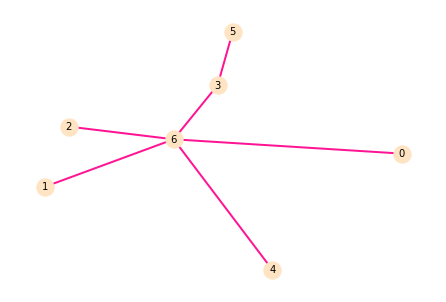

My traversal is df
Neighbors of node 0: ['6']
Neighbors of node 1: ['6']
Neighbors of node 2: ['6']
Neighbors of node 3: ['5', '6']
Neighbors of node 4: ['6']
Neighbors of node 5: ['3']
Neighbors of node 6: ['4', '1', '0', '3', '2']
{'6': '2', '4': '6', '1': '6', '0': '6', '3': '6', '5': '3'}
{'6': '2', '4': '6', '1': '6', '0': '6', '3': '6', '5': '3'}
{'2': '0', '6': '1', '4': '2', '1': '3', '0': '4', '3': '5', '5': '6'}
nr of seqs:
7
new seqs before loop
[Seq('gcgaaatgtaacacggtagaggtgatcggggtgcgttatacgtgcgtggtgacc...aga'), None, None, None, None, None, None]
idx:2, i=0
idx:6, i=1
idx:4, i=2
idx:1, i=3
idx:0, i=4
idx:3, i=5
idx:5, i=6
new s1-index:
5
seqs new:
[Seq('atggatttatctgctgttcgcgttgaagaagtacaaaatgtcattaatgctatg...tga'), Seq('gtaccttgatttcgtattctgagaggctgctgcttagcggtagccccttggttt...aaa'), Seq('atggatttatctgcggatcatgttgaagaagtacaaaatgtcctcaatgctatg...tag'), Seq('gttccgaaaggctagcgctaggcgccaagcggccggtttccttggcgacggaga...aca'), Seq('gcgaaatgtaacacggtagaggtgatcggggtgcgttatacgtgcgtg

(313974,
 [['g', '-', '-', '-', '-', 'g', 'g'],
  ['c', '-', '-', '-', '-', 't', 't'],
  ['g', '-', '-', '-', '-', '-', '-'],
  ['a', '-', '-', '-', '-', '-', '-'],
  ['a', '-', '-', '-', '-', '-', '-'],
  ['a', '-', '-', '-', '-', '-', '-'],
  ['t', '-', '-', '-', '-', '-', '-'],
  ['g', '-', '-', '-', '-', '-', '-'],
  ['t', '-', '-', '-', '-', '-', '-'],
  ['a', '-', '-', '-', '-', '-', '-'],
  ['a', '-', '-', '-', '-', '-', '-'],
  ['c', '-', '-', '-', '-', '-', '-'],
  ['a', 'a', 'a', 'a', 'a', 'a', '-'],
  ['c', '-', '-', '-', '-', 'c', 't'],
  ['g', '-', '-', '-', '-', 'c', 'c'],
  ['g', '-', '-', '-', '-', 't', '-'],
  ['t', 't', 't', 't', 't', 't', 'c'],
  ['a', '-', '-', '-', '-', '-', '-'],
  ['g', '-', '-', '-', '-', '-', '-'],
  ['a', '-', '-', '-', '-', '-', '-'],
  ['g', '-', '-', '-', '-', '-', '-'],
  ['g', 'g', 'g', 'g', 'g', 'g', 'g'],
  ['t', '-', '-', '-', '-', 'a', 'a'],
  ['-', '-', '-', '-', '-', 't', '-'],
  ['-', '-', '-', '-', '-', 't', '-'],
  ['-', '-', '-'

In [20]:
#running it!! (not ruining it hopefully :P )

#not running because of some list index ggrrrr WTF

new_sp_approxi_combi(brca_seqs_long[0][0:7],score_matrix,gap_cost)